# Описание датасета

Данные о поездках на такси в Нью-Йорке. \
Целевая переменная: trip_duration (длительность поездки). \
Задача: "Мы предсказываем длительность поездки на такси".\
Признаки: Пространственные и временные признаки

# Импорт

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

import math
import warnings

In [52]:
sns.set(style="whitegrid", context="notebook")

In [53]:
warnings.filterwarnings('ignore')

In [54]:
train = pd.read_csv('/kaggle/input/cu-project-data/train.csv')
test = pd.read_csv('/kaggle/input/cu-project-data/test.csv')

# EDA

In [55]:
print(f'Размер train: {train.shape}')
print(f'Размер test: {test.shape}')

Размер train: (1458644, 11)
Размер test: (625134, 9)


## Посмотрим, как выглядит наш датасет

In [56]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [57]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## Основная инфорация

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [59]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Кол-во nan значений

In [60]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### Кайф, nan нет

## Анализ таргета

In [61]:
target = 'trip_duration'

print(f'Максимум: {train[target].max()}')
print(f'Минимум: {train[target].min()}')
print(f'Среднее: {train[target].mean()}')
print(f'Среднее: {train[target].median()}')
print(f'Квантили: \n{train[target].quantile([0.25, 0.5, 0.75, 0.9, 0.99])}')

Максимум: 3526282
Минимум: 1
Среднее: 959.4922729603659
Среднее: 662.0
Квантили: 
0.25     397.0
0.50     662.0
0.75    1075.0
0.90    1634.0
0.99    3440.0
Name: trip_duration, dtype: float64


### Распределение таргета

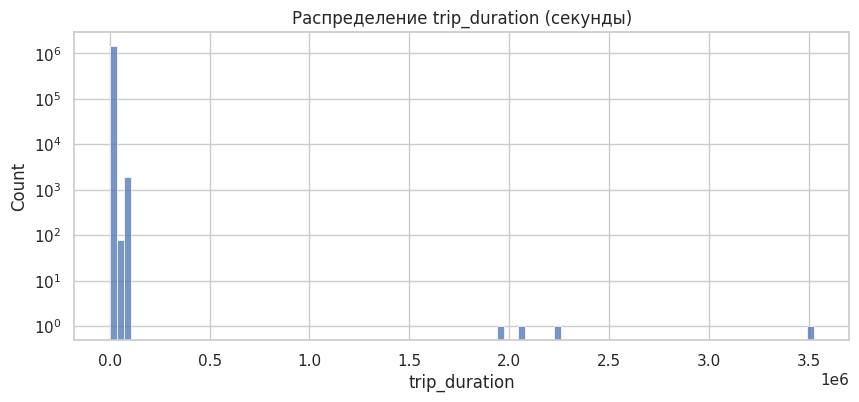

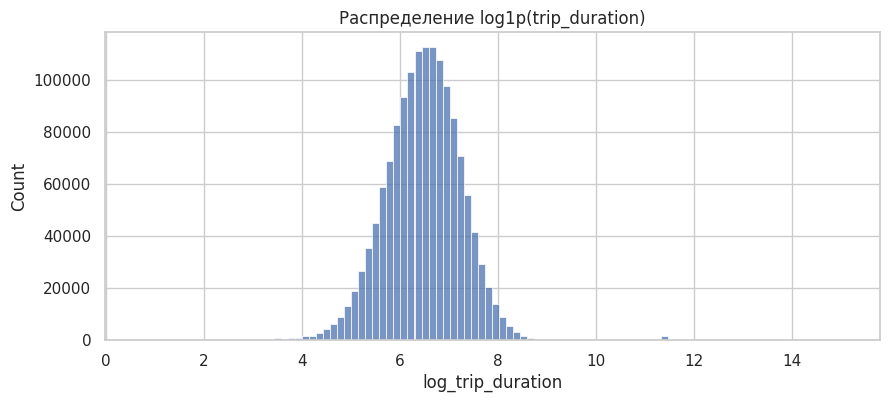

In [62]:
plt.figure(figsize=(10, 4))
sns.histplot(train[target], bins=100, kde=False)
plt.title("Распределение trip_duration (секунды)")
plt.xlabel("trip_duration")
plt.yscale("log")
plt.show()

train["log_trip_duration"] = np.log1p(train[target])

plt.figure(figsize=(10, 4))
sns.histplot(train["log_trip_duration"], bins=100, kde=False)
plt.title("Распределение log1p(trip_duration)")
plt.xlabel("log_trip_duration")
plt.show()

##  Временная фича

### Приведём к нормальному виду

In [63]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

In [64]:
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_minute'] = train['pickup_datetime'].dt.minute
train['pickup_day_of_week'] = train['pickup_datetime'].dt.dayofweek
train['pickup_month'] = train['pickup_datetime'].dt.month
train['is_weekend'] = train['pickup_day_of_week'].isin([5, 6]).astype(int)

In [65]:
train['dropoff_hour'] = train['dropoff_datetime'].dt.hour
train['dropoff_minute'] = train['dropoff_datetime'].dt.minute

In [66]:
train = train.drop(columns=['pickup_datetime'], axis=1)
train = train.drop(columns=['dropoff_datetime'], axis=1)

In [67]:
train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,dropoff_hour,dropoff_minute
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,17,24,0,3,0,17,32
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,0,43,6,6,1,0,54
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,11,35,1,1,0,12,10
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,19,32,2,4,0,19,39
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,13,30,5,3,1,13,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,13,31,4,4,0,13,44
1458640,id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,7,35,6,1,1,7,46
1458641,id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,6,57,4,4,0,7,10
1458642,id2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,15,56,1,1,0,16,2


### Распределение поездок по часам

In [68]:
hour_duration = train.groupby('pickup_hour')[target].mean().reset_index().sort_values('pickup_hour')

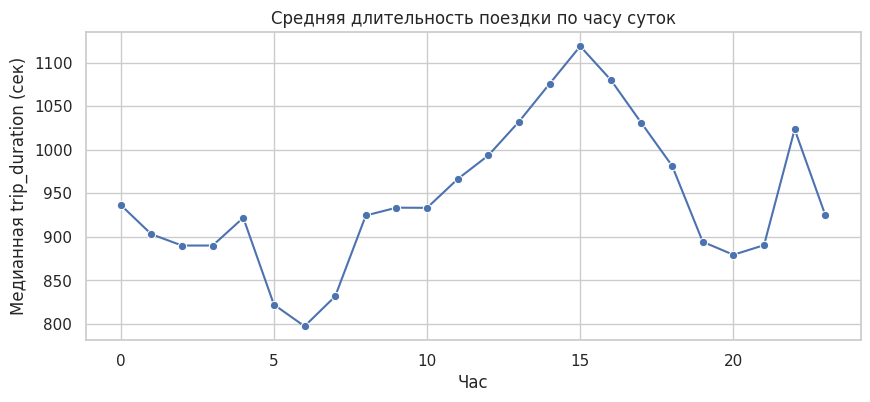

In [69]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=hour_duration, x="pickup_hour", y=target, marker="o")
plt.title("Средняя длительность поездки по часу суток")
plt.xlabel("Час")
plt.ylabel("Медианная trip_duration (сек)")
plt.show()

### Распределение поездок по дням недели

In [70]:
day_of_week_duration = train.groupby('pickup_day_of_week')[target].mean().reset_index().sort_values('pickup_day_of_week')

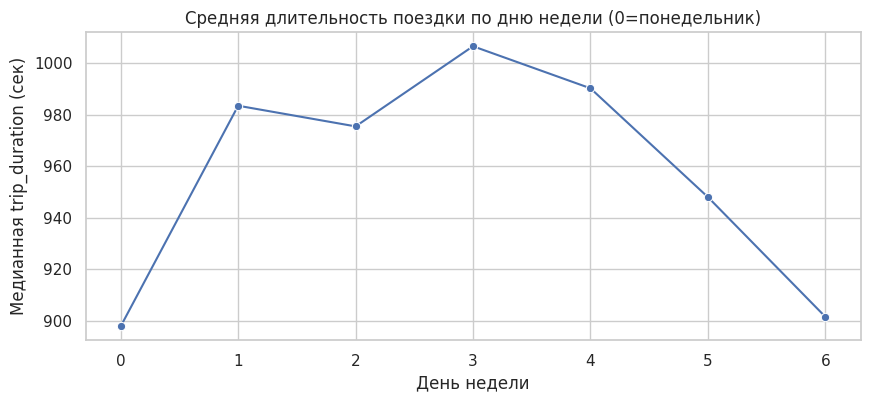

In [71]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=day_of_week_duration, x="pickup_day_of_week", y=target, marker="o")
plt.title("Средняя длительность поездки по дню недели (0=понедельник)")
plt.xlabel("День недели")
plt.ylabel("Медианная trip_duration (сек)")
plt.show()

## Георграфические признаки

### Приведём к нрмальному виду

In [72]:
def haversine(lon1, lat1, lon2, lat2):
    R = 6371
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [73]:
train['distance_km'] = haversine(train["pickup_longitude"], train["pickup_latitude"], train["dropoff_longitude"], train["dropoff_latitude"])

### Посмоторим на распредеение расстояний поездок

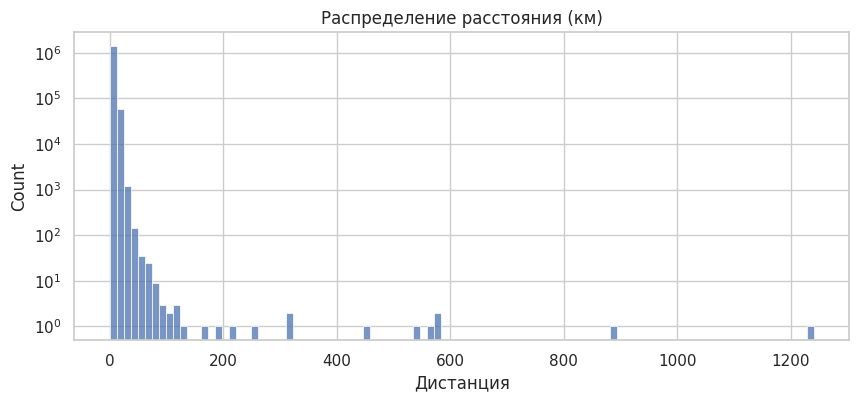

In [74]:
plt.figure(figsize=(10, 4))
sns.histplot(train["distance_km"], bins=100, kde=False)
plt.title("Распределение расстояния (км)")
plt.xlabel("Дистанция")
plt.yscale("log")
plt.show()

In [75]:
train["distance_km"].describe()

count    1.458644e+06
mean     3.440864e+00
std      4.296538e+00
min      0.000000e+00
25%      1.231837e+00
50%      2.093717e+00
75%      3.875337e+00
max      1.240909e+03
Name: distance_km, dtype: float64

## Проче признаки

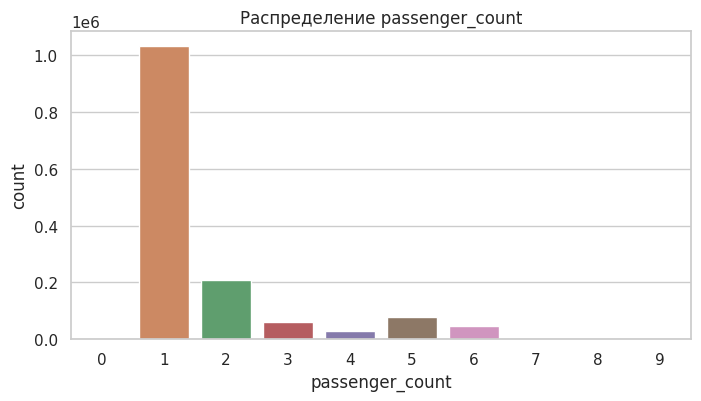

In [76]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train, x="passenger_count")
plt.title("Распределение passenger_count")
plt.show()

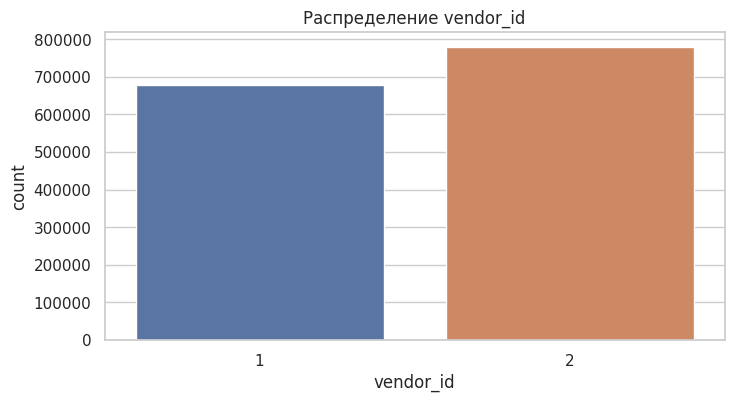

In [77]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train, x="vendor_id")
plt.title("Распределение vendor_id")
plt.show()

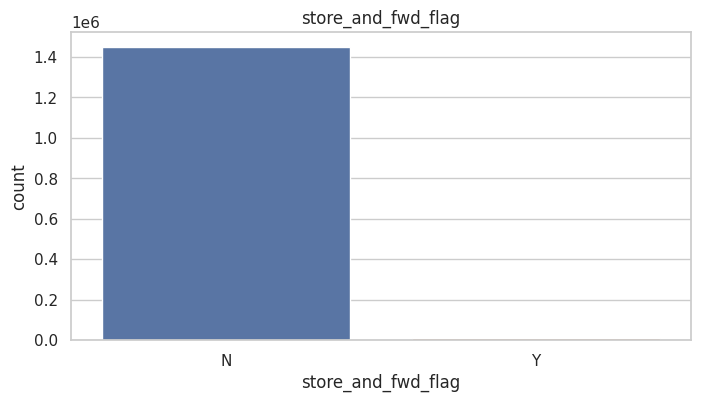

In [78]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train, x="store_and_fwd_flag")
plt.title("store_and_fwd_flag")
plt.show()

# Подготовка данных

## Очистка выбросов

In [79]:
clean_train = train.copy()

In [80]:
clean_train = clean_train[
    (clean_train[target] >= 1) & (clean_train[target] <= 86400)
]

In [81]:
clean_train = clean_train[
    (clean_train["distance_km"] > 0) & (clean_train["distance_km"] <= 200)
]

In [82]:
clean_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,dropoff_hour,dropoff_minute,distance_km
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,17,24,0,3,0,17,32,1.498521
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,0,43,6,6,1,0,54,1.805507
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,11,35,1,1,0,12,10,6.385098
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,19,32,2,4,0,19,39,1.485498
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,13,30,5,3,1,13,38,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,13,31,4,4,0,13,44,1.225080
1458640,id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,7,35,6,1,1,7,46,6.049836
1458641,id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,6,57,4,4,0,7,10,7.824606
1458642,id2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,15,56,1,1,0,16,2,1.092564


In [83]:
clean_train["log_trip_duration"] = np.log1p(clean_train[target])

In [84]:
clean_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,dropoff_hour,dropoff_minute,distance_km
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,17,24,0,3,0,17,32,1.498521
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,0,43,6,6,1,0,54,1.805507
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,11,35,1,1,0,12,10,6.385098
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,19,32,2,4,0,19,39,1.485498
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,13,30,5,3,1,13,38,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,13,31,4,4,0,13,44,1.225080
1458640,id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,7,35,6,1,1,7,46,6.049836
1458641,id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,6,57,4,4,0,7,10,7.824606
1458642,id2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,15,56,1,1,0,16,2,1.092564


In [85]:
clean_train = pd.get_dummies(clean_train, columns=["vendor_id"], drop_first=True)
clean_train = pd.get_dummies(clean_train, columns=["store_and_fwd_flag"], drop_first=True)

In [86]:
clean_train

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,dropoff_hour,dropoff_minute,distance_km,vendor_id_2,store_and_fwd_flag_Y
0,id2875421,1,-73.982155,40.767937,-73.964630,40.765602,455,6.122493,17,24,0,3,0,17,32,1.498521,True,False
1,id2377394,1,-73.980415,40.738564,-73.999481,40.731152,663,6.498282,0,43,6,6,1,0,54,1.805507,False,False
2,id3858529,1,-73.979027,40.763939,-74.005333,40.710087,2124,7.661527,11,35,1,1,0,12,10,6.385098,True,False
3,id3504673,1,-74.010040,40.719971,-74.012268,40.706718,429,6.063785,19,32,2,4,0,19,39,1.485498,True,False
4,id2181028,1,-73.973053,40.793209,-73.972923,40.782520,435,6.077642,13,30,5,3,1,13,38,1.188588,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,4,-73.982201,40.745522,-73.994911,40.740170,778,6.658011,13,31,4,4,0,13,44,1.225080,True,False
1458640,id1049543,1,-74.000946,40.747379,-73.970184,40.796547,655,6.486161,7,35,6,1,1,7,46,6.049836,False,False
1458641,id2304944,1,-73.959129,40.768799,-74.004433,40.707371,764,6.639876,6,57,4,4,0,7,10,7.824606,True,False
1458642,id2714485,1,-73.982079,40.749062,-73.974632,40.757107,373,5.924256,15,56,1,1,0,16,2,1.092564,False,False


In [87]:
clean_train = clean_train.drop(columns=['id'])

# Разделение данных

In [88]:
X, y = clean_train.drop(columns=['log_trip_duration'], axis=1), clean_train['log_trip_duration']

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [90]:
X_train

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,dropoff_hour,dropoff_minute,distance_km,vendor_id_2,store_and_fwd_flag_Y
98247,1,-73.991959,40.756989,-73.981987,40.762211,762,16,50,5,4,1,17,3,1.021066,True,False
1391585,2,-73.953293,40.771778,-73.992172,40.690151,2337,23,12,6,2,1,23,51,9.649621,True,False
36924,1,-74.001572,40.730900,-74.006470,40.720448,651,19,37,5,2,1,19,47,1.233355,False,False
942484,1,-74.015137,40.709751,-73.994507,40.740978,691,22,47,6,5,1,22,59,3.883176,True,False
579173,5,-73.977303,40.754379,-73.976143,40.760681,106,7,19,4,6,0,7,21,0.707512,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260232,1,-73.951546,40.773685,-73.951843,40.781689,221,17,33,4,1,0,17,36,0.890272,False,False
1420179,1,-74.004204,40.742310,-74.011734,40.713848,859,0,8,5,3,1,0,23,3.227755,False,False
132467,1,-73.979675,40.764988,-73.991119,40.774853,389,19,49,0,4,0,19,55,1.460138,False,False
673937,1,-73.971634,40.762917,-73.998924,40.761158,4402,1,56,6,3,1,3,9,2.306754,True,False


# Бэйслайн модель

In [91]:
model = LinearRegression()

In [92]:
model.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = model.predict(X_val)

In [101]:
print(f'Бейслайн RMSLE: {np.sqrt(mean_squared_log_error(y_true=y_val, y_pred=y_pred))}')

Бейслайн RMSLE: 0.08184214225616819


# Бейслайн RMSLE: 0.08184214225616819